In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("housing_data.csv")

In [3]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [4]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

#### Q. Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?

A. The information data is present in common separated value file (CSV) alled housing_data.csv. Each row represents house details. There are 18 attributes namely date, price,bedrooms, bathrooms,sqft_living, sqft_lot, floors, waterfront, view, condition, sqft_above, yr_built, yr_renovate, street, city, statezip, country. The .info() method gives the detail information of the attribute such as number of rows, attribute type and non-null values. There are 4600 records on the file. 

The features which are continuous are: sqft_living, sqft_lot, sqft_above, sqft_base. date, street, city, statezip and country since they have Dtype "object". "date", "city", "statezip" and "country" has multiple repetitive value so these attributes are categorical attributes.

In [6]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

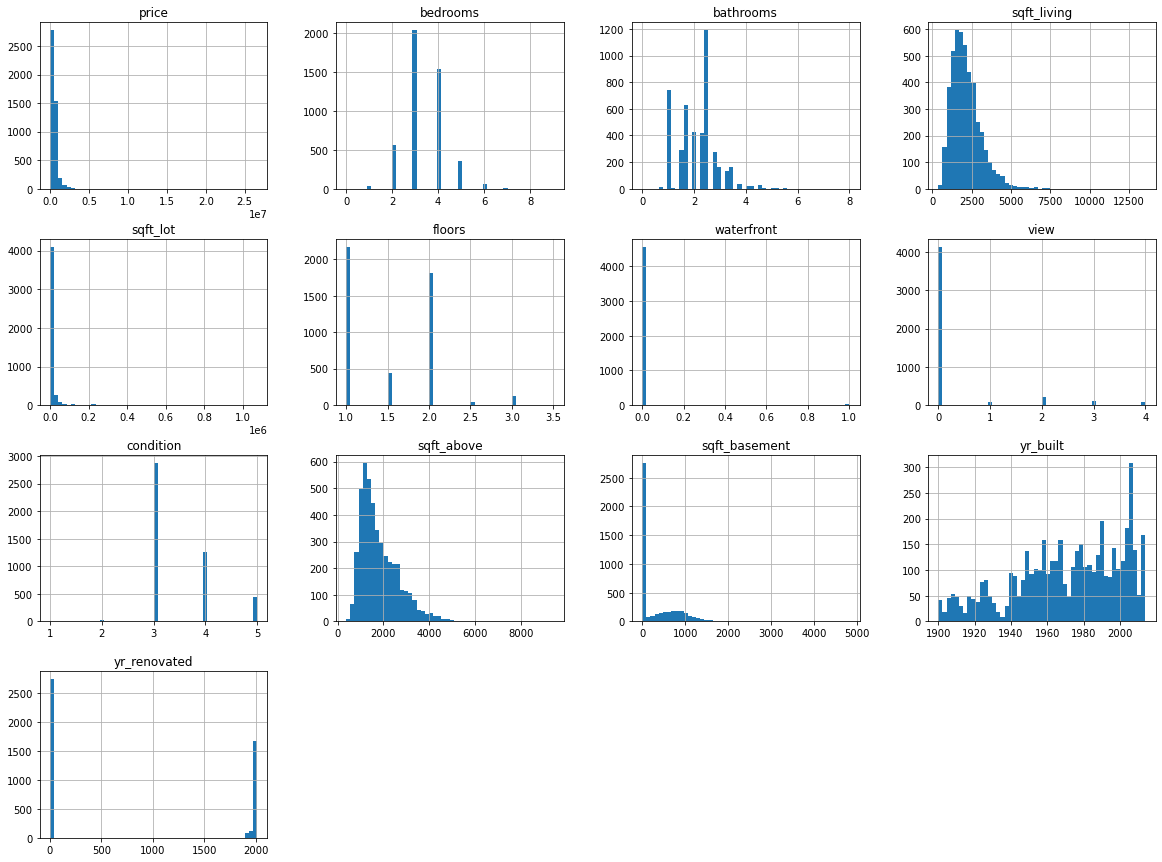

In [7]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

#### Q. Display the statistical values for each of the attributes, along with visualizations (e.g. histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require? How is the data distributed for each feature/attribute? What bad data problems could be present?
A. Observation from histograms:
    
    1. Price attribute value is capped in histogram. The value is expressed in 0.0-2.5. The price value are between $20,000 to $1,00,000. 
    
    2. The sqft_living and price are linear to eachother as the sqft_living size increases the price increases. From the price data we can observe thet most of the values are between $20,000 and $1,00,0000. Some of the prices are above $10,00,000. 
    
    3. Some of the values in Street have "-" values.
    
    4. Some of the histograms are left-leaning. We need to transform it into the bell shaped distribution.

In [8]:
attributes = ['price','bedrooms','bathrooms','sqft_lot','sqft_living','floors','waterfront','condition', 'yr_built','yr_renovated']

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='price'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='price'>,
        <AxesSubplot:xlabel='floors', ylabel='price'>,
        <AxesSubplot:xlabel='waterfront', ylabel='price'>,
        <AxesSubplot:xlabel='condition', ylabel='price'>,
        <AxesSubplot:xlabel='yr_built', ylabel='price'>,
        <AxesSubplot:xlabel='yr_renovated', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='floors', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='waterfront', ylabel='bedrooms'>,
  

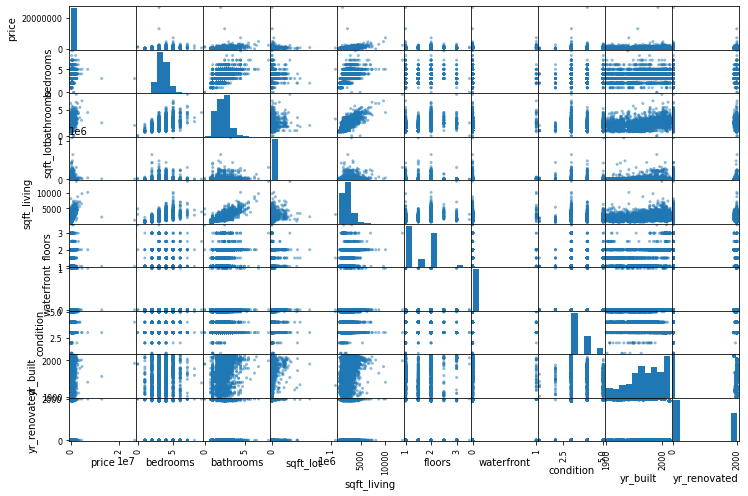

In [9]:
scatter_matrix(df[attributes], figsize=(12, 8))

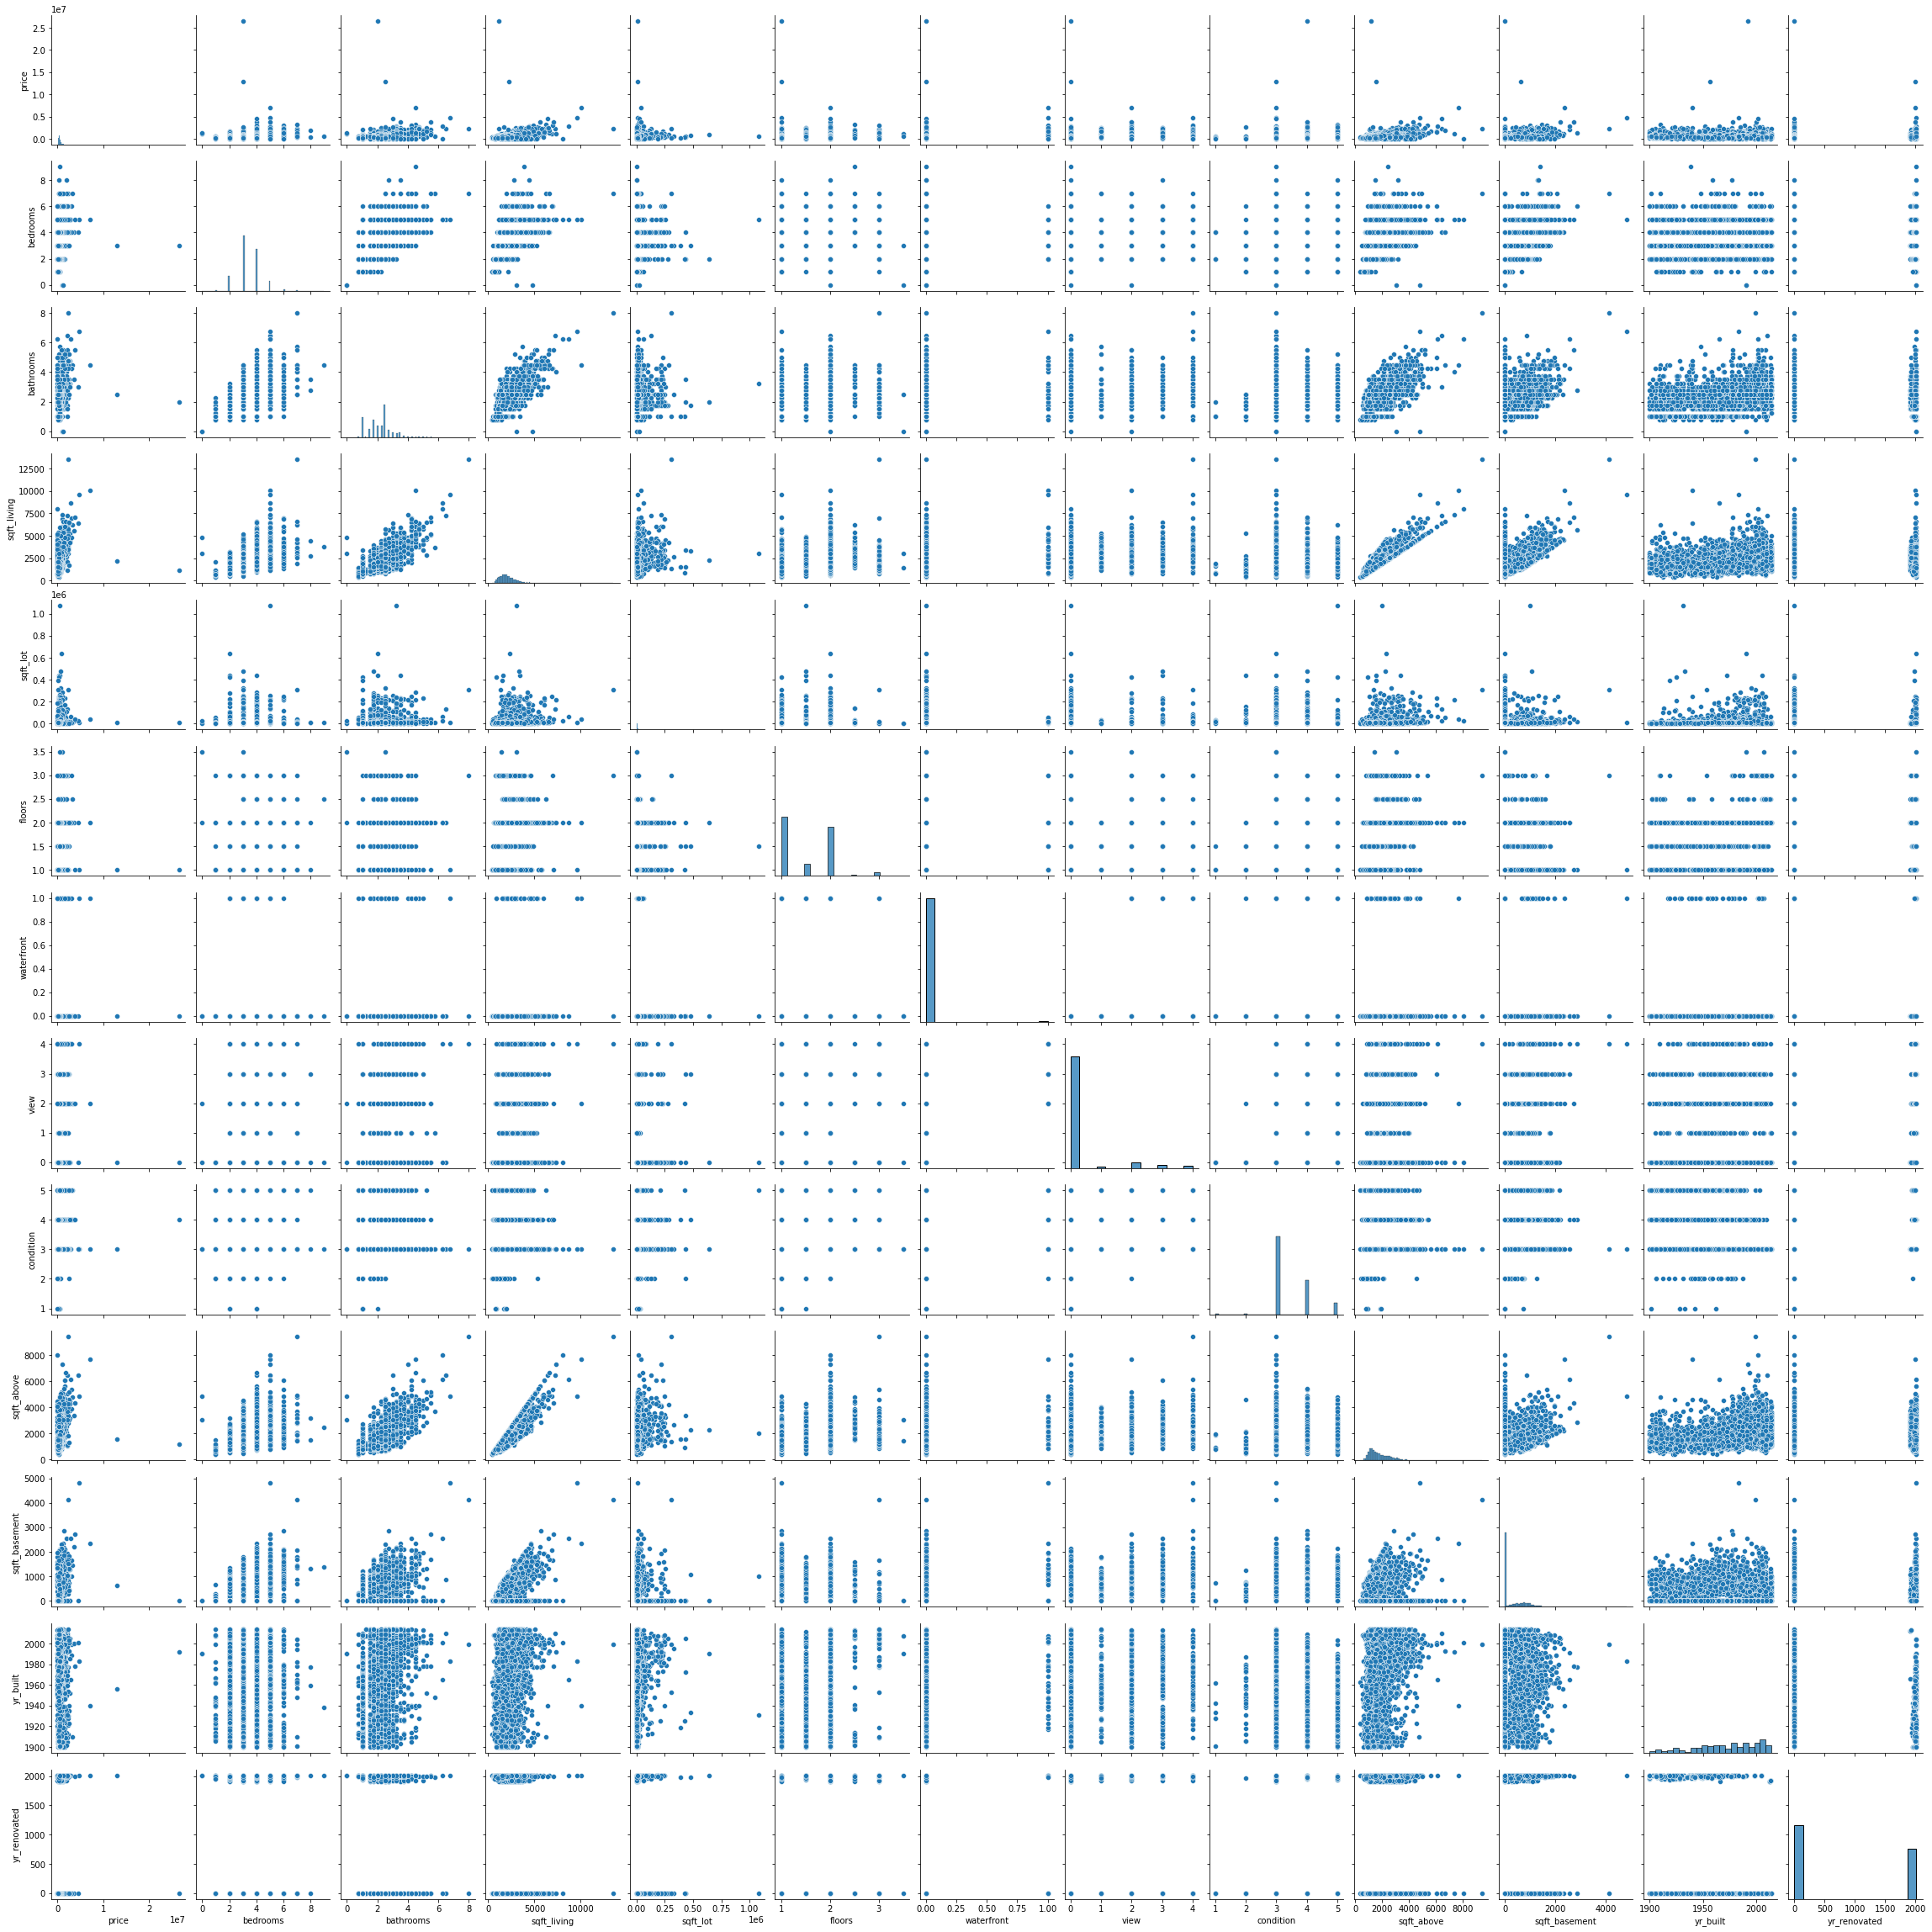

In [10]:
sns.pairplot(df)

In [11]:
correlation = df.corr()

In [12]:
correlation

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


In [13]:
correlation['price'].sort_values(ascending = False)

price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_lot         0.050451
condition        0.034915
yr_built         0.021857
yr_renovated    -0.028774
Name: price, dtype: float64

#### Q. Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.
A. We can see that, "yr_renovated" is weakly negative correlated. coefficient close to zero means no linear correlation  The attribute "sqft_living" is the most postively correlated with "price" among all the attributes. It is thus most relevant when predicting the "price" variable. 

Scatter plot of sqft_living with respect to price shows that there is a small increase in price when as the sqft_living increases. Whereas since there is no correlation between "yr_renovated", the scatter plot does not give us any evidence about change in prices when changes in "yr_renovated" occur.

#### Q. Which attributes can be removed from the data, since they may not be useful for predicting the housing price. Why?

A. Considering the correlation matrix, "sqft_lot", "condition", "yr_built", "yr_renovated" can be removed since they have a pretty low correlation with price as they won't impact the prediction of price. Categorical attributes can also be ignored. 


In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

#### Q. Discuss how you split the data, including describing why you choose to do it this way.

A. The data is splitted randomly into test set and train set. Generally, 20% of the total dataset is taken as test dataset and remaining 80% is taken as the train dataset. Since we try to ensure that the test set has the most variance in the dataset, 80:20 split is considered to be optimal. Since it might generate different random dataset everytime we run the model, we have used a random seed.

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = LabelEncoder()
housing_cat = df["city"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)


#### Q. Discuss how you dealt with missing data and/or categorical data, if necessary, including describing why you choose to do it this way.
A. Thereis no missing data in the dataset. However, categorical data does exist in the dataset. From df.info() we have recognized the datatype of each attribute. There are some attributes which have dataype "object", these are "date", "city", "street", "country" and "statezip". For the attribute "city" we have used one-hot encoding such that each city mapped to 0 to N. We then create one binary attribute per category. Here, we used sparse matrix and stored the location of non-zero value.

In [16]:
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

In [17]:
X = df['price']
y = df['sqft_living']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 42)

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

regr = LinearRegression()
regr.fit(X_train, y_train)

print("Intercepts: ",regr.intercept_)

print("Coefficients: ", regr.coef_)

y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

MSE = mean_squared_error(y_train,y_train_pred)

RMSE = math.sqrt(MSE)

print("Accuracy: ",r2_score(y_train,y_train_pred) * 100)
print("RMSE: ", RMSE)

Intercepts:  1194.8022513355477
Coefficients:  [0.00172818]
Accuracy:  46.18112310332564
RMSE:  703.2344523057398


In [18]:
X = df['price']
y = df['sqft_above']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 42)

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

regr = LinearRegression()
regr.fit(X_train, y_train)

print("Intercepts: ",regr.intercept_)

print("Coefficients: ", regr.coef_)

y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

MSE = mean_squared_error(y_train,y_train_pred)

RMSE = math.sqrt(MSE)
print("Accuracy: ",r2_score(y_train,y_train_pred) * 100)
print("RMSE: ", RMSE)

Intercepts:  1104.3641041033466
Coefficients:  [0.00131476]
Accuracy:  33.28998248003755
RMSE:  701.5548433360692


In [19]:
y = df['price']
X = df.drop('price',axis=1)
#Removing all the categorical attributes
X = X.drop(['date','street','city','statezip','country'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 42)


regr = LinearRegression()
regr.fit(X_train, y_train)

print("Intercept :",regr.intercept_)

print("Coefficients: \n", regr.coef_)

y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

MSE = mean_squared_error(y_train,y_train_pred)

RMSE = math.sqrt(MSE)

print("Accuracy: ",r2_score(y_train,y_train_pred) * 100)
print("RMSE: ", RMSE)

Intercept : 4925638.066192725
Coefficients: 
 [-6.44974616e+04  3.65204407e+04  1.86049845e+02 -5.14414161e-01
  6.98247401e+04  3.82459666e+05  4.47558418e+04  2.93355394e+04
  9.68608170e+01  8.91890277e+01 -2.56916353e+03  8.25991734e+00]
Accuracy:  54.4185359314763
RMSE:  254489.35382490707


#### Q. Train a Linear Regression model (see chapter 2 of ”Hands-on Machine Learning...”) using the training data. Then make predictions of the housing prices of the test data, using the trained model. Summarize performance using the appropriate evaluation metrics. Analyze and discuss the results. Also, include thoughts about what further can be explored to increase performance.

A. We can see that when we try to predict the price variable using the "sqft_living" attribute, we get an accuracy of 46% and Root Mean Square Error(RMSE) of 786.43. We tried that particular attribute since it has the most positive correlation with that of price. Then we try next attribute "sqft_above" since it has the second highest positive correlation with "price". For this, we get an accuracy of 33% which is quite low alongwith a RMSE of 609776.28 which is quite high. So next we try to predict the "price" by dropping all the categorical values. On doing so, we get an accuracy of 54% but the RMSE in this case is 254489.35. In order to increase the performance of the model, we can use different options such as adding more data, using a different regression model etc. 